In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
plt.rc('axes', titlesize=15)  # fontsize of the axes title
plt.rc('axes', labelsize=15)  # fontsize of the x and y labels
plt.rc('xtick', labelsize=12)  # fontsize of the tick labels
plt.rc('ytick', labelsize=12)  # fontsize of the tick labels
plt.rc('legend', fontsize=12)  # legend fontsize
plt.rc('figure', titlesize=40)  # fontsize of the figure title

In [98]:
expert = "960_correct_phases_"
main_phase = "endgame"


data_path = f"train_logs/{expert+main_phase}/"

dataset_names = [("Phase0Test", "test opening"), ("Phase1Test", "test midgame"), ("Phase2Test", "test endgame"), ("PhaseNoneTest", "test no-phases"), ("train", "train")]
#metric_names = ["run-.-tag-policy_acc_", "run-.-tag-value_acc_sign_", "run-.-tag-loss_"]
#y_labels = ["policy acc", "value acc", "loss"]
metric_names = ["run-.-tag-policy_acc_", "run-.-tag-loss_"]
y_labels = ["policy acc", "loss"]
cmap = plt.get_cmap("tab10")

In [89]:
# final metric values of run
metric_info_df_val = pd.read_csv(data_path+"run-.-tag-loss_"+"val"+".csv")
checkpoint_step = list(metric_info_df_val.sort_values(by="Value", ascending=True)["Step"])[0]
print(checkpoint_step)
metric_values = {"run-.-tag-loss_": list(), "run-.-tag-policy_acc_": list(), "dataset": list()}

for idx, metric_name in enumerate(metric_names):
    for dataset_name, label in dataset_names:
        metric_info_df = pd.read_csv(data_path+metric_name+dataset_name+".csv")
        metric_value = list(metric_info_df[metric_info_df["Step"] == checkpoint_step]["Value"])[0]
        metric_values[metric_name].append(metric_value)
        if metric_name == "run-.-tag-loss_":
            metric_values["dataset"].append(dataset_name)
        print(metric_value)
#print(metric_values)
metric_values_df = pd.DataFrame.from_dict(metric_values)
metric_values_df.to_csv(f"metrics.csv", mode='a', header=False)
metric_values_df

391
0.4855488836765289
0.5456647872924805
0.5907412171363831
0.5388396382331848
0.5728710889816284
1.5445208549499512
1.3724700212478638
1.2088167667388916
1.382707118988037
1.2481491565704346


,run-.-tag-loss_,run-.-tag-policy_acc_,metric
0,1.544521,0.485549,960_correct_phases_no-phases
1,1.372470,0.545665,960_correct_phases_no-phases
2,1.208817,0.590741,960_correct_phases_no-phases
3,1.382707,0.538840,960_correct_phases_no-phases
4,1.248149,0.572871,960_correct_phases_no-phases


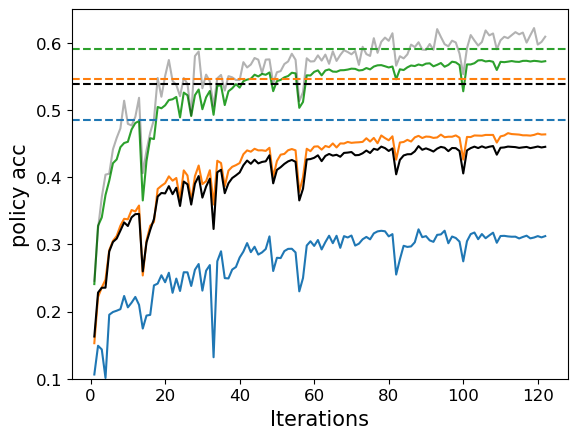

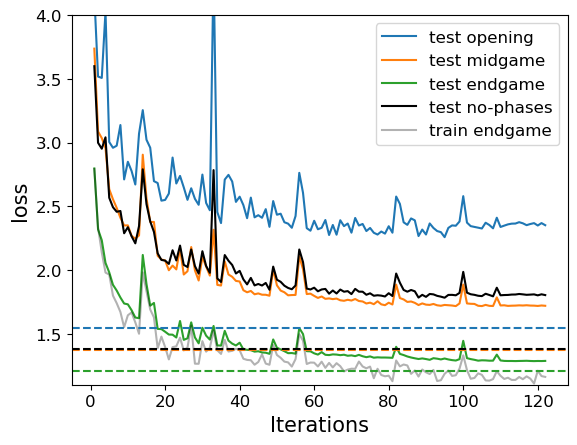

In [100]:
# create loss and acc plots
for idx, metric_name in enumerate(metric_names):
    for dataset_name, label in dataset_names:
        metric_info_df = pd.read_csv(data_path+metric_name+dataset_name+".csv")
        if label in ["val", "train"]:
            train_label = label+(f" no-phases ({main_phase} weighted)" if "weighted" in expert else f" {main_phase}")
            plt.plot(metric_info_df["Step"], metric_info_df["Value"], label=train_label, alpha=0.3, color="black")
        elif label == "test no-phases":
            plt.plot(metric_info_df["Step"], metric_info_df["Value"], label=label, color="black")
        else:
            plt.plot(metric_info_df["Step"], metric_info_df["Value"], label=label)
    plt.xlabel("Iterations")
    plt.ylabel(y_labels[idx])

    if y_labels[idx] == "loss":
        if main_phase != "no-phases":
            plt.axhline(y=1.5445 if "960" in expert else 0.92694, color=cmap(0), linestyle='dashed')#, label="test opening - Regular Learning")
            plt.axhline(y=1.372470021 if "960" in expert else 1.5043, color=cmap(1), linestyle='dashed')#, label="test midgame - Regular Learning")
            plt.axhline(y=1.208816767 if "960" in expert else 1.3523, color=cmap(2), linestyle='dashed')#, label="test endgame - Regular Learning")
            plt.axhline(y=1.382707119 if "960" in expert else 1.2897, color='black', linestyle='dashed')#, label="test no-phases - Regular Learning")
        plt.ylim((1.1 if "960" in expert else 0.5, 4))
        plt.legend()
    else:
        if main_phase != "no-phases":
            plt.axhline(y=0.485548884 if "960" in expert else 0.6793, color=cmap(0), linestyle='dashed')
            plt.axhline(y=0.545664787 if "960" in expert else 0.4905, color=cmap(1), linestyle='dashed')
            plt.axhline(y=0.590741217 if "960" in expert else 0.52648, color=cmap(2), linestyle='dashed')
            plt.axhline(y=0.538839638 if "960" in expert else 0.558, color='black', linestyle='dashed')
        plt.ylim((0.1, 0.65 if "960" in expert else 0.7))
    plt.savefig(f'plots/{expert+main_phase}_{y_labels[idx]}.pdf', bbox_inches='tight')
    plt.show()

In [142]:
# staged learning approach (split plot in three parts)
expert = "cont_phases_"
main_phase = "endgame"


data_path = f"train_logs/{expert+main_phase}/"

dataset_names = [("Phase0Test", "test opening"), ("Phase1Test", "test midgame"), ("Phase2Test", "test endgame"), ("PhaseNoneTest", "test no-phases"), ("train", "train")]
#metric_names = ["run-.-tag-policy_acc_", "run-.-tag-value_acc_sign_", "run-.-tag-loss_"]
#y_labels = ["policy acc", "value acc", "loss"]
metric_names = ["run-.-tag-policy_acc_", "run-.-tag-loss_"]
y_labels = ["policy acc", "loss"]
h_line_values = [0.92694, 1.5043, 1.3523, 1.2897]
cmap = plt.get_cmap("tab10")

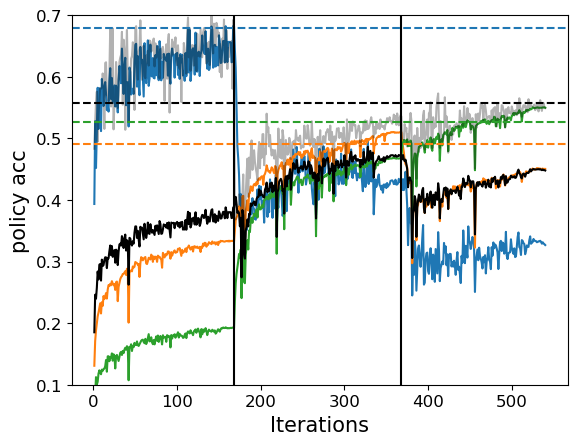

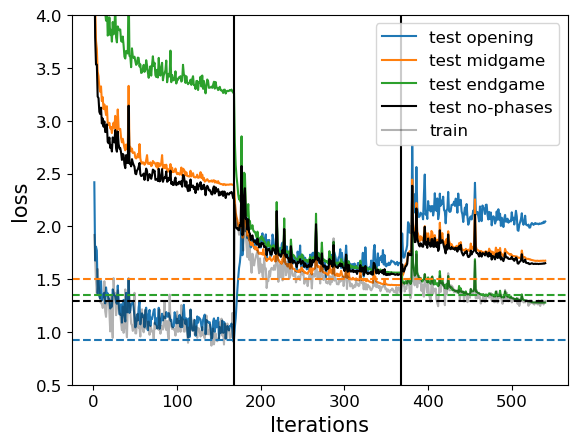

[(168, 368), (168, 368), (168, 368), (168, 368), (168, 368), (168, 368), (168, 368), (168, 368), (168, 368), (168, 368)]


In [143]:
cutoffs = list()
for idx, metric_name in enumerate(metric_names):
    cutoff1 = 0
    cutoff2 = 0
    for dataset_name, label in dataset_names:
        metric_info_df1 = pd.read_csv(data_path+"part1/"+metric_name+dataset_name+".csv")
        metric_info_df2 = pd.read_csv(data_path+"part2/"+metric_name+dataset_name+".csv")
        metric_info_df2["Step"] = metric_info_df2["Step"] + len(metric_info_df1)
        metric_info_df3 = pd.read_csv(data_path+"part3/"+metric_name+dataset_name+".csv")
        metric_info_df3["Step"] = metric_info_df3["Step"] + (len(metric_info_df1) + len(metric_info_df2))
        metric_info_df = pd.concat([metric_info_df1, metric_info_df2, metric_info_df3], ignore_index=True, sort=False)
        cutoffs.append((len(metric_info_df1), len(metric_info_df1) + len(metric_info_df2)))
        cutoff1 = len(metric_info_df1)
        cutoff2 = len(metric_info_df1) + len(metric_info_df2)
        
        if label in ["val", "train"]:
            plt.plot(metric_info_df["Step"], metric_info_df["Value"], label=(label+f""), alpha=0.3, color="black")
        elif label == "test no-phases":
            plt.plot(metric_info_df["Step"], metric_info_df["Value"], label=label, color="black")
        else:
            plt.plot(metric_info_df["Step"], metric_info_df["Value"], label=label)
    plt.xlabel("Iterations")
    plt.ylabel(y_labels[idx])

    if y_labels[idx] == "loss":
        plt.axhline(y=0.92694, color=cmap(0), linestyle='dashed')#, label="test opening - Regular Learning")
        plt.axhline(y=1.5043, color=cmap(1), linestyle='dashed')#, label="test midgame - Regular Learning")
        plt.axhline(y=1.3523, color=cmap(2), linestyle='dashed')#, label="test endgame - Regular Learning")
        plt.axhline(y=1.2897, color='black', linestyle='dashed')#, label="test no-phases - Regular Learning")
        plt.ylim((0.5, 4))
        plt.legend()
    else:
        plt.axhline(y=0.6793, color=cmap(0), linestyle='dashed')
        plt.axhline(y=0.4905, color=cmap(1), linestyle='dashed')
        plt.axhline(y=0.52648, color=cmap(2), linestyle='dashed')
        plt.axhline(y=0.558, color='black', linestyle='dashed')
        plt.ylim((0.1, 0.7))
    plt.axvline(cutoff1, color="black")
    plt.axvline(cutoff2, color="black")
    plt.savefig(f'plots/{expert+main_phase}_{y_labels[idx]}.pdf', bbox_inches='tight')
    plt.show()
print(cutoffs)

In [18]:
results_df = pd.read_csv("../cutechess-cli/all_matches_outcomes.csv")

In [19]:
results_df.describe()

,Unnamed: 0,bsize,movetime,nodes,simuls,A_games,A_elo_diff,A_elo_err,A_pts,A_pct,...,t_wwins,t_bwins,t_draws,wwin_pct,bwin_pct,draws_pct,white_pct,black_pct,f_games,u_games
count,350.000000,350.000000,350.000000,350.000000,350.000000,350.0,350.000000,350.000000,350.000000,350.000000,...,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.0,350.0
mean,174.500000,30.137143,260.857143,548.000000,1096.000000,1000.0,65.493994,18.571790,591.332857,59.133286,...,333.768571,393.634286,272.597143,33.376857,39.363429,27.259714,47.006714,52.993286,1000.0,0.0
std,101.180532,26.447624,465.096172,920.716054,1841.432107,0.0,54.037741,1.605785,74.466209,7.446621,...,66.820425,53.624108,117.682057,6.682043,5.362411,11.768206,1.442187,1.442187,0.0,0.0
min,0.000000,1.000000,0.000000,0.000000,0.000000,1000.0,-86.888960,12.671441,377.500000,37.750000,...,133.000000,214.000000,46.000000,13.300000,21.400000,4.600000,43.550000,47.400000,1000.0,0.0
25%,87.250000,8.000000,0.000000,0.000000,0.000000,1000.0,32.405150,17.594674,546.500000,54.650000,...,288.250000,362.000000,190.000000,28.825000,36.200000,19.000000,46.000000,52.050000,1000.0,0.0
50%,174.500000,16.000000,0.000000,100.000000,200.000000,1000.0,68.628810,18.752956,597.500000,59.750000,...,333.500000,392.000000,273.500000,33.350000,39.200000,27.350000,46.900000,53.100000,1000.0,0.0
75%,261.750000,64.000000,400.000000,800.000000,1600.000000,1000.0,105.156784,19.771108,646.875000,64.687500,...,382.000000,435.000000,350.000000,38.200000,43.500000,35.000000,47.950000,54.000000,1000.0,0.0
max,349.000000,64.000000,1600.000000,3200.000000,6400.000000,1000.0,161.921381,21.454804,717.500000,71.750000,...,482.000000,502.000000,653.000000,48.200000,50.200000,65.300000,52.600000,56.450000,1000.0,0.0


In [115]:
filtered_df = results_df[(results_df["playerA"] == "ClassicAra_correct_phases") & (results_df["playerB"] == "ClassicAra_no_phases")]
filtered_df.describe()

,Unnamed: 0,bsize,movetime,nodes,simuls,A_games,A_elo_diff,A_elo_err,A_pts,A_pct,...,t_wwins,t_bwins,t_draws,wwin_pct,bwin_pct,draws_pct,white_pct,black_pct,f_games,u_games
count,55.00000,55.000000,55.000000,55.000000,55.000000,55.0,55.000000,55.000000,55.000000,55.000000,...,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.0,55.0
mean,181.00000,24.200000,281.818182,572.727273,1145.454545,1000.0,122.198576,19.038058,668.327273,66.832727,...,339.163636,396.618182,264.218182,33.916364,39.661818,26.421818,47.127273,52.872727,1000.0,0.0
std,16.02082,22.624471,484.611685,964.260328,1928.520656,0.0,22.745231,1.380433,29.071307,2.907131,...,57.841662,43.145100,98.302197,5.784166,4.314510,9.830220,1.370213,1.370213,0.0,0.0
min,154.00000,1.000000,0.000000,0.000000,0.000000,1000.0,69.712980,15.493601,599.000000,59.900000,...,225.000000,298.000000,63.000000,22.500000,29.800000,6.300000,44.300000,50.000000,1000.0,0.0
25%,167.50000,8.000000,0.000000,0.000000,0.000000,1000.0,105.251830,18.267423,647.000000,64.700000,...,295.000000,368.500000,193.500000,29.500000,36.850000,19.350000,46.300000,52.275000,1000.0,0.0
50%,181.00000,16.000000,0.000000,100.000000,200.000000,1000.0,120.281726,19.044813,666.500000,66.650000,...,337.000000,392.000000,269.000000,33.700000,39.200000,26.900000,47.200000,52.800000,1000.0,0.0
75%,194.50000,32.000000,400.000000,800.000000,1600.000000,1000.0,140.418479,20.087801,691.750000,69.175000,...,379.000000,434.000000,330.500000,37.900000,43.400000,33.050000,47.725000,53.700000,1000.0,0.0
max,208.00000,64.000000,1600.000000,3200.000000,6400.000000,1000.0,159.358448,21.345714,714.500000,71.450000,...,463.000000,478.000000,477.000000,46.300000,47.800000,47.700000,50.000000,55.700000,1000.0,0.0


In [117]:
table = pd.pivot_table(results_df, values='A_elo_diff', index=['playerA', 'playerB'],
                       columns=['bsize'], aggfunc="mean")

In [118]:
table

bsize                                                                     1   \
playerA                              playerB                                   
ClassicAra_cont_learning             ClassicAra_no_phases          71.331798   
ClassicAra_cont_learning_seed9       ClassicAra_no_phases         111.678938   
                                     ClassicAra_no_phases_seed9    73.298208   
ClassicAra_correct_endgame           ClassicAra_no_phases                NaN   
ClassicAra_correct_midgame           ClassicAra_no_phases                NaN   
ClassicAra_correct_opening           ClassicAra_no_phases                NaN   
ClassicAra_correct_phases            ClassicAra_no_phases         106.890747   
ClassicAra_correct_phases_seed9      ClassicAra_no_phases_seed9    66.022302   
ClassicAra_correct_phases_weighted   ClassicAra_no_phases          25.611558   
ClassicAra_correct_phases_weighted01 ClassicAra_no_phases          50.405649   
ClassicAra_no_phases                 ClassicAra_specific_endgame  -76.044948   
                                     ClassicAra_specific_midgame  -56.611386   
                                     ClassicAra_specific_opening         NaN   

bsize                                                                     8   \
playerA                              playerB                                   
ClassicAra_cont_learning             ClassicAra_no_phases                NaN   
ClassicAra_cont_learning_seed9       ClassicAra_no_phases         120.807055   
                                     ClassicAra_no_phases_seed9          NaN   
ClassicAra_correct_endgame           ClassicAra_no_phases                NaN   
ClassicAra_correct_midgame           ClassicAra_no_phases                NaN   
ClassicAra_correct_opening           ClassicAra_no_phases                NaN   
ClassicAra_correct_phases            ClassicAra_no_phases         123.445286   
ClassicAra_correct_phases_seed9      ClassicAra_no_phases_seed9          NaN   
ClassicAra_correct_phases_weighted   ClassicAra_no_phases          23.197991   
ClassicAra_correct_phases_weighted01 ClassicAra_no_phases          52.415688   
ClassicAra_no_phases                 ClassicAra_specific_endgame         NaN   
                                     ClassicAra_specific_midgame         NaN   
                                     ClassicAra_specific_opening         NaN   

bsize                                                                     16  \
playerA                              playerB                                   
ClassicAra_cont_learning             ClassicAra_no_phases                NaN   
ClassicAra_cont_learning_seed9       ClassicAra_no_phases         122.486086   
                                     ClassicAra_no_phases_seed9          NaN   
ClassicAra_correct_endgame           ClassicAra_no_phases                NaN   
ClassicAra_correct_midgame           ClassicAra_no_phases                NaN   
ClassicAra_correct_opening           ClassicAra_no_phases                NaN   
ClassicAra_correct_phases            ClassicAra_no_phases         126.806832   
ClassicAra_correct_phases_seed9      ClassicAra_no_phases_seed9          NaN   
ClassicAra_correct_phases_weighted   ClassicAra_no_phases          23.517444   
ClassicAra_correct_phases_weighted01 ClassicAra_no_phases          56.331039   
ClassicAra_no_phases                 ClassicAra_specific_endgame  -57.610804   
                                     ClassicAra_specific_midgame  -68.908350   
                                     ClassicAra_specific_opening   12.870296   

bsize                                                                     32  \
playerA                              playerB                                   
ClassicAra_cont_learning             ClassicAra_no_phases                NaN   
ClassicAra_cont_learning_seed9       ClassicAra_no_phases         125.003310   
                                     ClassicAra_no_phases_seed9          NaN 

In [121]:
table2 = pd.pivot_table(results_df, values='A_elo_diff', index=['playerA', 'playerB'],
                       columns=['bsize'], aggfunc=('mean','std'))
table2

mean  \
bsize                                                                     1    
playerA                              playerB                                   
ClassicAra_cont_learning             ClassicAra_no_phases          71.331798   
ClassicAra_cont_learning_seed9       ClassicAra_no_phases         111.678938   
                                     ClassicAra_no_phases_seed9    73.298208   
ClassicAra_correct_endgame           ClassicAra_no_phases                NaN   
ClassicAra_correct_midgame           ClassicAra_no_phases                NaN   
ClassicAra_correct_opening           ClassicAra_no_phases                NaN   
ClassicAra_correct_phases            ClassicAra_no_phases         106.890747   
ClassicAra_correct_phases_seed9      ClassicAra_no_phases_seed9    66.022302   
ClassicAra_correct_phases_weighted   ClassicAra_no_phases          25.611558   
ClassicAra_correct_phases_weighted01 ClassicAra_no_phases          50.405649   
ClassicAra_no_phases                 ClassicAra_specific_endgame  -76.044948   
                                     ClassicAra_specific_midgame  -56.611386   
                                     ClassicAra_specific_opening         NaN   

                                                                              \
bsize                                                                     8    
playerA                              playerB                                   
ClassicAra_cont_learning             ClassicAra_no_phases                NaN   
ClassicAra_cont_learning_seed9       ClassicAra_no_phases         120.807055   
                                     ClassicAra_no_phases_seed9          NaN   
ClassicAra_correct_endgame           ClassicAra_no_phases                NaN   
ClassicAra_correct_midgame           ClassicAra_no_phases                NaN   
ClassicAra_correct_opening           ClassicAra_no_phases                NaN   
ClassicAra_correct_phases            ClassicAra_no_phases         123.445286   
ClassicAra_correct_phases_seed9      ClassicAra_no_phases_seed9          NaN   
ClassicAra_correct_phases_weighted   ClassicAra_no_phases          23.197991   
ClassicAra_correct_phases_weighted01 ClassicAra_no_phases          52.415688   
ClassicAra_no_phases                 ClassicAra_specific_endgame         NaN   
                                     ClassicAra_specific_midgame         NaN   
                                     ClassicAra_specific_opening         NaN   

                                                                              \
bsize                                                                     16   
playerA                              playerB                                   
ClassicAra_cont_learning             ClassicAra_no_phases                NaN   
ClassicAra_cont_learning_seed9       ClassicAra_no_phases         122.486086   
                                     ClassicAra_no_phases_seed9          NaN   
ClassicAra_correct_endgame           ClassicAra_no_phases                NaN   
ClassicAra_correct_midgame           ClassicAra_no_phases                NaN   
ClassicAra_correct_opening           ClassicAra_no_phases                NaN   
ClassicAra_correct_phases            ClassicAra_no_phases         126.806832   
ClassicAra_correct_phases_seed9      ClassicAra_no_phases_seed9          NaN   
ClassicAra_correct_phases_weighted   ClassicAra_no_phases          23.517444   
ClassicAra_correct_phases_weighted01 ClassicAra_no_phases          56.331039   
ClassicAra_no_phases                 ClassicAra_specific_endgame  -57.610804   
                                     ClassicAra_specific_midgame  -68.908350   
                                     ClassicAra_specific_opening   12.870296   

                                                                              \
bsize                                                                     32   
playerA                              playerB                         

In [21]:
table2 = pd.pivot_table(results_df, values='A_elo_diff', index=['playerA', 'playerB'],
                       columns=['bsize'], aggfunc=('mean','std'))

table2 = table2.swaplevel(0, 1, axis=1).sort_index(axis=1)

# Print the modified pivot table
table2

bsize                                                                     1   \
                                                                        mean   
playerA                              playerB                                   
ClassicAra_cont_learning             ClassicAra_no_phases          71.331798   
ClassicAra_cont_learning_seed9       ClassicAra_no_phases         111.678938   
                                     ClassicAra_no_phases_seed9    73.298208   
ClassicAra_correct_endgame           ClassicAra_no_phases                NaN   
ClassicAra_correct_midgame           ClassicAra_no_phases                NaN   
ClassicAra_correct_opening           ClassicAra_no_phases                NaN   
ClassicAra_correct_phases            ClassicAra_no_phases         106.890747   
ClassicAra_correct_phases_seed9      ClassicAra_no_phases_seed9    66.022302   
ClassicAra_correct_phases_weighted   ClassicAra_no_phases          25.611558   
ClassicAra_correct_phases_weighted01 ClassicAra_no_phases          50.405649   
ClassicAra_no_phases                 ClassicAra_specific_endgame  -76.044948   
                                     ClassicAra_specific_midgame  -56.611386   
                                     ClassicAra_specific_opening         NaN   

bsize                                                                        \
                                                                        std   
playerA                              playerB                                  
ClassicAra_cont_learning             ClassicAra_no_phases         13.972476   
ClassicAra_cont_learning_seed9       ClassicAra_no_phases         20.498658   
                                     ClassicAra_no_phases_seed9   17.053246   
ClassicAra_correct_endgame           ClassicAra_no_phases               NaN   
ClassicAra_correct_midgame           ClassicAra_no_phases               NaN   
ClassicAra_correct_opening           ClassicAra_no_phases               NaN   
ClassicAra_correct_phases            ClassicAra_no_phases         18.290228   
ClassicAra_correct_phases_seed9      ClassicAra_no_phases_seed9   10.076088   
ClassicAra_correct_phases_weighted   ClassicAra_no_phases          8.552235   
ClassicAra_correct_phases_weighted01 ClassicAra_no_phases         12.337874   
ClassicAra_no_phases                 ClassicAra_specific_endgame   9.882423   
                                     ClassicAra_specific_midgame  16.410884   
                                     ClassicAra_specific_opening        NaN   

bsize                                                                     8   \
                                                                        mean   
playerA                              playerB                                   
ClassicAra_cont_learning             ClassicAra_no_phases                NaN   
ClassicAra_cont_learning_seed9       ClassicAra_no_phases         120.807055   
                                     ClassicAra_no_phases_seed9          NaN   
ClassicAra_correct_endgame           ClassicAra_no_phases                NaN   
ClassicAra_correct_midgame           ClassicAra_no_phases                NaN   
ClassicAra_correct_opening           ClassicAra_no_phases                NaN   
ClassicAra_correct_phases            ClassicAra_no_phases         123.445286   
ClassicAra_correct_phases_seed9      ClassicAra_no_phases_seed9          NaN   
ClassicAra_correct_phases_weighted   ClassicAra_no_phases          23.197991   
ClassicAra_correct_phases_weighted01 ClassicAra_no_phases          52.415688   
ClassicAra_no_phases                 ClassicAra_specific_endgame         NaN   
                                     ClassicAra_specific_midgame         NaN   
                                     ClassicAra_specific_opening         NaN   

bsize                                                                        \
                                                                        std   
playerA        

In [22]:
table2 = pd.pivot_table(results_df, values='A_elo_diff', index=['playerA', 'playerB'],
                       columns=['nodes'], aggfunc=('mean'))

#table2 = table2.swaplevel(0, 1, axis=1).sort_index(axis=1)

# Print the modified pivot table
table2

nodes                                                                   0     \
playerA                              playerB                                   
ClassicAra_cont_learning             ClassicAra_no_phases          87.733446   
ClassicAra_cont_learning_seed9       ClassicAra_no_phases         137.299278   
                                     ClassicAra_no_phases_seed9    86.469391   
ClassicAra_correct_endgame           ClassicAra_no_phases          93.225514   
ClassicAra_correct_midgame           ClassicAra_no_phases          65.550098   
ClassicAra_correct_opening           ClassicAra_no_phases          -0.555890   
ClassicAra_correct_phases            ClassicAra_no_phases         136.726606   
ClassicAra_correct_phases_seed9      ClassicAra_no_phases_seed9    76.651584   
ClassicAra_correct_phases_weighted   ClassicAra_no_phases          29.379872   
ClassicAra_correct_phases_weighted01 ClassicAra_no_phases          69.233531   
ClassicAra_no_phases                 ClassicAra_specific_endgame  -76.044948   
                                     ClassicAra_specific_midgame  -62.690785   
                                     ClassicAra_specific_opening         NaN   

nodes                                                                  100   \
playerA                              playerB                                  
ClassicAra_cont_learning             ClassicAra_no_phases         66.495559   
ClassicAra_cont_learning_seed9       ClassicAra_no_phases         75.100757   
                                     ClassicAra_no_phases_seed9   47.926034   
ClassicAra_correct_endgame           ClassicAra_no_phases         36.264425   
ClassicAra_correct_midgame           ClassicAra_no_phases         58.927807   
ClassicAra_correct_opening           ClassicAra_no_phases         -5.906974   
ClassicAra_correct_phases            ClassicAra_no_phases         89.722640   
ClassicAra_correct_phases_seed9      ClassicAra_no_phases_seed9   50.026215   
ClassicAra_correct_phases_weighted   ClassicAra_no_phases          8.148099   
ClassicAra_correct_phases_weighted01 ClassicAra_no_phases         25.845481   
ClassicAra_no_phases                 ClassicAra_specific_endgame -38.058848   
                                     ClassicAra_specific_midgame -55.182398   
                                     ClassicAra_specific_opening  21.045984   

nodes                                                                  200   \
playerA                              playerB                                  
ClassicAra_cont_learning             ClassicAra_no_phases         62.909773   
ClassicAra_cont_learning_seed9       ClassicAra_no_phases         90.932240   
                                     ClassicAra_no_phases_seed9   50.944901   
ClassicAra_correct_endgame           ClassicAra_no_phases         36.264425   
ClassicAra_correct_midgame           ClassicAra_no_phases         56.071481   
ClassicAra_correct_opening           ClassicAra_no_phases          0.000000   
ClassicAra_correct_phases            ClassicAra_no_phases         94.363603   
ClassicAra_correct_phases_seed9      ClassicAra_no_phases_seed9   48.982811   
ClassicAra_correct_phases_weighted   ClassicAra_no_phases          6.256103   
ClassicAra_correct_phases_weighted01 ClassicAra_no_phases         36.418806   
ClassicAra_no_phases                 ClassicAra_specific_endgame -39.667838   
                                     ClassicAra_specific_midgame -73.336701   
                                     ClassicAra_specific_opening   6.777089   

nodes                                                                   400   \
playerA                              playerB                                   
ClassicAra_cont_learning             ClassicAra_no_phases          67.219911   
ClassicAra_cont_learning_seed9       ClassicAra_no_phases         105.641921   
                                     ClassicAra_no_phases_seed9    58.597432   
ClassicAra_correct_endgame 